# Python Final Project: Meten is weten, know your uncertainty!

Suppose we want to measure the acceleration of $g$ due to gravity. This can be calculated by dropping a weight from a known distance and measuring the fall time. In this assignment you will learn how to estimate the error in such a measurement. Among the many sources of error, one clear one is the error in determining the fall time. Lets say we are using a stop watch where the start and stop time were recorded by a human pushing the button.

A good question that a physicist would then ask is: how do you know what value you should use for the uncertainty in the measured time? 

The rigorous answer for this that you should not estimate the uncertainty by "guessing", you should actually **measure** the uncertainty!

How would this work? Well, one way would be to have two signals that we know are exactly 10 seconds apart, and have one person use the stopwatch to try to measure the time, and then compare this to the known value. And, of course, since the exact time the person with the stopwatch measures might vary from one run of the experiment to the next, you would want to repeat this many times to get some statistics and take a look at the distribution of the measured results. From this distribution, you can then say concrete things about the uncertainty in the measured time. 

How many times is "many times"? If I really want to build a distribution, I would want to have **A LOT** of samples: here below we will look at 1000 different repetition of the same experiment! (This sound painful, but could be done by having a group of 100 students repeat the same timing measurement 10 times.)

In this assignment you will:
* Load a data set of time measurements 
* Use a function to calculate histograms of the measurements
* Make some plots of the histograms you calculate
* Create a python function to generate a Gaussian curve
* Fit the data "by hand" to a Gaussian curve
* Perform a least-squares fit to the data 
* Determine the error in this timing measurement 

Here below, I import some standard libraries. Feel free to import more libraries in your own code cells if you wish.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.dpi'] = 100

## Part 1: Loading and plotting the data

The file `measurement_results.csv` contains two columns: the first is a number describing which repetition of the experiment it was, and the second is the measured time in seconds.

Load the data from the file and make a plot of the measured time vs. measurement number.

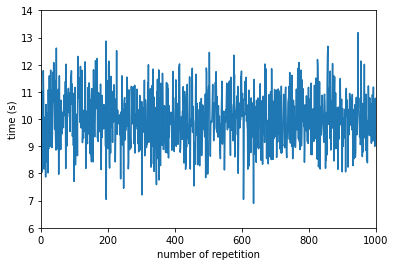

In [3]:
#load data and seperate the number of repetition from the time
data = np.loadtxt("https://github.com/lduynkerke/workshopPython/raw/main/Tests/measurement_results.csv", delimiter=",")
number = data[:,0]
time = data[:,1]

#plot and show the data and add labels for time and number to the correct axis 
plt.plot(number, time)
plt.xlabel("number of repetition")
plt.ylabel("time (s)")
plt.xlim(0,1000)
plt.ylim(6,14)
plt.show()

## Part 2: Plotting the histograms

In this part of the question, we will plot some <a href=https://en.wikipedia.org/wiki/Histogram>histograms</a> of the data. The easiest way to plot histograms in python is to use the histogram plotting function that is built into `matplotlib`: 

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

Basic usage of the function is as follows: for an array x, if you want to plot a histogram with 50 bins, you can use this code:

```
plt.hist(x,bins=50)
plt.show()
```

**(a)** Use the code above to make a plot of the histogram of the full dataset you loaded from the file with 50 bins, adding of course plotting code to make appropriate axis labels. 

In [ ]:
#plot and show the histogram and add labels for time and frequency
plt.hist(time, bins=50)
plt.xlabel("time (s)")
plt.ylabel("frequency")
plt.show()

As you can see, although we have a lot of statistics (1000 points!), the distribution curve is still pretty noisy. What if we had fewer points? How noisy would it be? 

We can check this actually by using python slicing to "slice out" sections of the dataset we loaded with a smaller number of points and comparing the plots of the histograms we get. 

**(b)** Complete the missing code in the cell below to plot the histograms of the first N=(10, 100, 1000) points of the dataset. The code will use the python `subplot` command to generate multiple plots in the same figure. For all histograms, use 50 bins.

In [ ]:
# Create arrays for the first N=(10, 100, 1000) of array time
time_10 = time[0:10]
time_100 = time[0:100]
time_1000 = time[0:1000]

# Tell Python to create subplots with size (15,4)
plt.subplots(figsize=(15,4))

# The first plot: histogram of the first 10 points with correct title and axis labels
plt.subplot(131)
plt.hist(time_10, bins=50)
plt.title("first 10 points")
plt.xlabel("time (s)")
plt.ylabel("frequency")

# The second plot: histogram of the first 100 points with correct title and axis labels
plt.subplot(132)
plt.hist(time_100, bins=50)
plt.title("first 100 points")
plt.xlabel("time (s)")
plt.ylabel("frequency")

# The third plot: histogram of the first 1000 points with correct title and axis labels
plt.subplot(133)
plt.hist(time_1000, bins=50)
plt.title("first 1000 points")
plt.xlabel("time (s)")
plt.ylabel("frequency")

plt.show()

Something to think about: is 10 points sufficient to make a clear statement about the distribution of timings?  

**(c)** Finally, we will need to not only plot the histogram, but to generate a `numpy` array that contains the histogram counts and the position of the middle of the "bins", that we will use in the following questions. Fortunately, there is a `numpy` function for doing this: 

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

It works in a very similar way to `plt.hist()`, and it returns two things:

* The histogram counts inside the bins it chooses
* The left and right edges of the bins it chooses

A minor detail is that if we have $N$ bins, they will have $N+1$ edges, but annoyingly we will have $N$ "count" values. The arrays  `counts` and `bins` will not be the same size, and so we cannot plot them against each other. But we can fix this with some fancy python slicing. The following code will calculate the histogram, storing it in a variable `counts`, and create an array `t` with the corresponding middle of the bins of the histogram, where I have loaded the measured times into a variable `meas_time`:

```
counts, bins = np.histogram(meas_time, bins=50)
count_time = (bins[:-1]+bins[1:])/2
```

Your  taks: 
* Copy-paste the above code and adapt it to you the variable names you have chosen in your previous code cells
* In the comment, explain in your own words what the code  `(bins[:-1]+bins[1:])/2` does and why it achieves our objective of finding the times corresponding to the middle of the bins

In [ ]:
counts, bins = np.histogram(time, bins=50)
count_time = (bins[:-1]+bins[1:])/2
print(count_time)

# My Explanation: 
#
# The code bins[:-1] returns an array of bins, except the last value of array bins
# The code bins[1:] returns an array of all bins, except the first value of array bins
# Therefore bins[1:] + bins[:-1] returns bins[n]+bins[n+1]
# So, (bins[n]+bins[n+1])/2 returns an array with the average of bins[n] and bins[n+1],
# which is an array with the times corresponding to the middle of the bin.

## Part 3: Programming a Gaussian function and fitting by hand

Looking at the histogram of the full dataset, it seems that it is probably well represented by a Gaussian distribution. Our next step is will be to fit the histogram data to a Gaussian distribution and see if it is a good fit. 

To test this, we will first program a function that calculates a Gaussian distribution function: 

$$
G(t, t_0, A, \sigma_t) = 
A \exp \left(
- \frac
{(t-t_0)^2}{2\sigma_t^2}
\right)
$$

where $t_0$ is the position of the peak of the Gaussian, $A$ is the peak value, and $\sigma_t$ is the standard deviation of the distribution.

**(a)** Create a python function to calculate a Gaussian distribution based on the formula above:

In [ ]:
# The functions asks for t (data), t0 (position of the peak),
# A (peak value), and sigma (standard deviation). 
# Afterwards it returns the Gaussian distribution:

def calc_gauss(t, t0, A, sigma):
    Gaussian = A*np.exp(-(t-t0)**2/2*sigma**2)
    return Gaussian

**(b)** Create a numpy array `t` that runs from 0 to 10 with 500 points, and make a plot of the Gaussian calculated by your function for $t_0 = 5$, $A = 1$ and $\sigma_t = 1$, and check if your function gives a plot like what you would expect.

In [ ]:
# create array
t = np.linspace(0,10,500)

# calculate Gaussian distribution, for t0=5, A=1, sigma=1 and plot
plt.plot(t, calc_gauss(t, 5, 1, 1))
plt.xlabel("time (s)")
plt.ylabel("Gaussian (t)")
plt.xlim(0,10)
plt.ylim(0,1.2)
plt.grid()
plt.show()

**(c)** Use your function to "fit" the histogram count data "**by hand**":

1. Plot the histogram data curve using the arrays `counts` and `count_time` that you calculated at the end of Part 2.
2. Make a guess of the parameters for the Gaussian curve based on your plot
3. Plot the Gaussian curve with your estimated parameters on top of the data 
4. Repeat 2 and 3 until the curve is "pretty close"

In these plots, use the style `'o'` for the data points so they are easy to tell apart from the Gaussian model curve.

In [ ]:
# Create numpy array that runs from the first value of count_time to
# the last value of count_time with 500 points
t_gauss = np.linspace(count_time[0], count_time[-1], 500)

# Plot histogram data curve and Gaussian curve with labels and legend
# Estimated parameters: t0 = 10 ((count_time[0]+count_time[-1])/2), # A=60 (max. counts), sigma=1.25
plt.plot(count_time, counts, 'o', label="Measurements")
plt.plot(t_gauss, calc_gauss(t_gauss, 10, 60, 1.25), label="Gaussian fit")
plt.xlabel("time (s)")
plt.ylabel("frequency")
plt.legend()
plt.show()


## Part 4: Fit your curve using `curve_fit()`

**(a)** Using the values you "fit by hand" in Part 3 as an initial guess, use python to calculate a least square fit. Make a plot of the data and the least-squares-fit curve. Again, use style `'o'` for the data points to distinguish them from the model curve (which should be plotted with a line). 

In [ ]:
# Import curve_fit
from scipy.optimize import curve_fit

# Calculate the optimum values, after telling python my own guesses
my_gauss_guesses = (10.2, 60, 12)
values, covariance = curve_fit(calc_gauss, count_time, counts, p0=my_gauss_guesses)

# Extract the found values:
fit_t0 = values[0]
fit_A = values[1]
fit_sigma = values[2]

# Plot and show the measurements and the best Gaussian fit
plt.plot(count_time, counts, 'o', label="Measurements")
plt.plot(t_gauss, calc_gauss(t_gauss, fit_t0, fit_A, fit_sigma), label="Gaussian fit")
plt.xlabel("time (s)")
plt.ylabel("frequency")
plt.legend()
plt.show()

**(b)** Print out sentences quoting the value of the parameters (with units) from their fit, along with the error value. When you print the values, use the python `round()` function to round the fitted value and the error to a decimal corresponding to two significant digits of the calculated error. 

(For example: if the fitted value is 5.32348723405 and the error is 0.12600324 then your code should round numbers 5.32 and 0.13 by using the `round()` function with a setting for two decimal places before printing them in the quoted values in the output.)

In [ ]:
# Error of the parameters
error_t0 = np.sqrt(covariance[0,0])
error_A = np.sqrt(covariance[1,1])
error_sigma = np.sqrt(covariance[2,2])

# Print the found values of the parameters with their errors to two significant digits 
print("Values of the parameters:")
print("t0 =", round(fit_t0, 4), "s +/-", round(error_t0, 4))
print("A =", round(fit_A, 1), "counts +/-", round(error_A, 1))
print("sigma =", round(fit_sigma, 2), "% +/-", round(error_sigma, 2))